# Task 2 

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
data = pd.read_csv('QVI_data.csv')
data

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [3]:
# Check for null values
data.isna().value_counts()

LYLTY_CARD_NBR  DATE   STORE_NBR  TXN_ID  PROD_NBR  PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  BRAND  LIFESTAGE  PREMIUM_CUSTOMER
False           False  False      False   False     False      False     False      False      False  False      False               264834
Name: count, dtype: int64

In [4]:
# Confirm dtypes
data.dtypes

LYLTY_CARD_NBR        int64
DATE                 object
STORE_NBR             int64
TXN_ID                int64
PROD_NBR              int64
PROD_NAME            object
PROD_QTY              int64
TOT_SALES           float64
PACK_SIZE             int64
BRAND                object
LIFESTAGE            object
PREMIUM_CUSTOMER     object
dtype: object

# Select control stores

We will start by defining a few metrics by which we will select stores. As the trial stores need to be similar to the trial stores, we will match based on these metrics. In order to do this we will need to transform the data first.

- Create a month column in the format of yyyymm

In [5]:
# Convert date column to datetime
data['DATE'] = pd.to_datetime(data['DATE'])

# Add month column in the format of yyyymm
data['MONTH'] = data['DATE'].dt.strftime('%Y%m').astype(int)
data.sort_values(['STORE_NBR', 'DATE'])

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH
253,1233,2018-07-01,1,266,110,WW Original Corn Chips 200g,1,1.9,200,WOOLWORTHS,YOUNG FAMILIES,Mainstream,201807
547,1482,2018-07-01,1,563,8,Smiths Crinkle Cut Chips Original 170g,1,2.9,170,SMITHS,YOUNG SINGLES/COUPLES,Mainstream,201807
104,1096,2018-07-02,1,110,68,Pringles Chicken Salt Crips 134g,1,3.7,134,PRINGLES,OLDER SINGLES/COUPLES,Premium,201807
430,1384,2018-07-02,1,445,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG SINGLES/COUPLES,Budget,201807
466,1414,2018-07-02,1,482,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150,DORITOS,RETIREES,Mainstream,201807
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264570,272242,2019-06-25,272,269986,81,Pringles Original Crisps 134g,2,7.4,134,PRINGLES,RETIREES,Mainstream,201906
264234,272005,2019-06-26,272,269641,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,KETTLE,YOUNG FAMILIES,Budget,201906
264300,272055,2019-06-28,272,269709,50,Tostitos Lightly Salted 175g,2,8.8,175,TOSTITOS,RETIREES,Budget,201906
264326,272074,2019-06-30,272,269737,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,OLDER SINGLES/COUPLES,Budget,201906


- Aggregate the data into the monthly amounts of each column split by Store number

In [6]:
def metric_calc():
    measure = data.groupby(['STORE_NBR', 'MONTH'])
    totSales = measure['TOT_SALES'].sum()
    nCustomers = measure['LYLTY_CARD_NBR'].nunique()
    nTxnPerCust = measure['TXN_ID'].count() / nCustomers
    nChipsPerTxn = measure['PROD_QTY'].sum() / measure['TXN_ID'].count()
    avgPricePerUnit = totSales / measure['PROD_QTY'].sum()
    aggregate = [totSales, nCustomers, nTxnPerCust, nChipsPerTxn, avgPricePerUnit]
    metrics = pd.concat(aggregate, axis=1)
    metrics.columns = ['totSales', 'nCustomers', 'nTxnPerCust', 'nChipsPerTxn', 'avgPricePerUnit']
    return metrics

In [7]:
# Create metrics dataframe
measureOverTime = metric_calc().reset_index()

# Sort by month
measureOverTime = measureOverTime.sort_values(['STORE_NBR','MONTH'])

measureOverTime

,STORE_NBR,MONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,1.895833,4.346154
3165,272,201903,442.3,50,1.060000,1.905660,4.379208
3166,272,201904,445.1,54,1.037037,1.875000,4.239048
3167,272,201905,314.6,34,1.176471,1.775000,4.430986


- Now we can filter the data between the pre-trial data and the full observation period stores

In [8]:
# Full observation data 

# Find stores that were observed for the full period
observe_counts = measureOverTime['STORE_NBR'].value_counts()
observe_index = observe_counts[observe_counts == 12].index

# Filter into new dataframe with only the stores found
storesWithFullObs = measureOverTime[measureOverTime['STORE_NBR'].isin(observe_index)]
storesWithFullObs

,STORE_NBR,MONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,1.895833,4.346154
3165,272,201903,442.3,50,1.060000,1.905660,4.379208
3166,272,201904,445.1,54,1.037037,1.875000,4.239048
3167,272,201905,314.6,34,1.176471,1.775000,4.430986


In [9]:
# Pre-trial data

# Filter all stores in the full observation to only have the data before the trial period
preTrialMeasures = measureOverTime[(measureOverTime['MONTH'] < 201902) & (measureOverTime['STORE_NBR'].isin(storesWithFullObs['STORE_NBR']))]
preTrialMeasures

,STORE_NBR,MONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3159,272,201809,304.7,32,1.125000,1.972222,4.291549
3160,272,201810,430.6,44,1.159091,1.941176,4.349495
3161,272,201811,376.2,41,1.097561,1.933333,4.324138
3162,272,201812,403.9,47,1.000000,1.893617,4.538202


Now that our data is filtered we can rank the similarity between control and trial stores

- Calculate correlation between each of the trial stores and control stores

In [10]:
# Correlation calculation
def calculateCorrelation(metricCol, storeComparison, inputTable = preTrialMeasures):
    # Create table of the trial stores
    controlStores = inputTable[~inputTable['STORE_NBR'].isin([77, 86, 88])]['STORE_NBR'].unique()
    corr = pd.DataFrame()
    trialStore = inputTable[inputTable['STORE_NBR'] == storeComparison][metricCol].reset_index()
    for control in controlStores:
        storage_df = pd.DataFrame(columns= ['TRIAL_STORE', 'CONTROL_STORE', 'CORRELATION_SCORE'])
        control_store = inputTable[inputTable['STORE_NBR'] == control][metricCol].reset_index()
        storage_df['CORRELATION_SCORE'] = trialStore.corrwith(control_store, axis=1)
        storage_df['TRIAL_STORE'] = storeComparison
        storage_df['CONTROL_STORE'] = control
        corr = pd.concat([corr, storage_df])
    corr = corr.groupby(['CONTROL_STORE']).mean().reset_index()
    corr['TRIAL_STORE'] = corr['TRIAL_STORE'].astype(int)
    return corr

- We can also calculate a standardised metric based on the absolute difference between the trial store's performance and each control store's performance

In [11]:
def calculateMagnitudeDistance(metricCol, storeComparison, inputTable = preTrialMeasures):
    controlStores = inputTable[~inputTable['STORE_NBR'].isin([77, 86, 88])]['STORE_NBR'].unique()
    calcDistTable = pd.DataFrame()
    
    for control in controlStores:
        calculatedMeasure = pd.DataFrame(columns= ['MONTH', 'TRIAL_STORE', 'CONTROL_STORE', 'MEASURE'])
        calculatedMeasure['MONTH'] = list(inputTable[inputTable['STORE_NBR'] == storeComparison]['MONTH'])
        calculatedMeasure['TRIAL_STORE'] = storeComparison
        calculatedMeasure['CONTROL_STORE'] = control
        calculatedMeasure['MEASURE'] = abs(inputTable[inputTable['STORE_NBR'] == storeComparison].reset_index()[metricCol] - inputTable[inputTable['STORE_NBR'] == control].reset_index()[metricCol]) 
        calcDistTable = pd.concat([calcDistTable, calculatedMeasure])
    return calcDistTable

- Now convert the measure column into an absolute value between 0 and 1 for the entire pre-trial period

In [12]:
# Standardize the magnitude distance
def minMaxDist(calcDistTable):
    # Calculate min and max distances by grouping by 'TRIAL_STORE' and 'MONTH'
    min_max_dist = calcDistTable.groupby(['TRIAL_STORE', 'MONTH'])['MEASURE'].agg(['min', 'max']).reset_index()
    min_max_dist.columns = ['TRIAL_STORE', 'MONTH', 'minDist', 'maxDist']

    # Merge the calculated min and max distances with the original calcDistTable
    distTable = pd.merge(calcDistTable, min_max_dist, on=['TRIAL_STORE', 'MONTH'])

    # Calculate the magnitude MEASURE
    distTable['mag_measure'] = 1 - (distTable['MEASURE'] - distTable['minDist']) / (distTable['maxDist'] - distTable['minDist'])
    finalDistTable = distTable.groupby(['CONTROL_STORE', 'TRIAL_STORE'])['mag_measure'].mean().reset_index()
    finalDistTable.convert_dtypes()
    return finalDistTable

Now we can put the funtions to use calculating the metrics in specificity

- Start with correlation of total sales and number of customers with store 77

In [13]:
corr_nSales = calculateCorrelation('totSales', 77)
corr_nSales

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE
0,1,77,-1.0
1,2,77,-1.0
2,3,77,-1.0
3,4,77,-1.0
4,5,77,-1.0
...,...,...,...
252,268,77,1.0
253,269,77,1.0
254,270,77,1.0
255,271,77,1.0


In [14]:
corr_nCustomers = calculateCorrelation('nCustomers', 77)
corr_nCustomers

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE
0,1,77,-1.0
1,2,77,-1.0
2,3,77,-1.0
3,4,77,-1.0
4,5,77,-1.0
...,...,...,...
252,268,77,1.0
253,269,77,1.0
254,270,77,1.0
255,271,77,1.0


- And now the magnitude for these same options

In [15]:
magnitude_nSales = minMaxDist(calculateMagnitudeDistance('totSales', 77))
magnitude_nSales

,CONTROL_STORE,TRIAL_STORE,mag_measure
0,1,77,0.955061
1,2,77,0.939318
2,3,77,0.354963
3,4,77,0.177414
4,5,77,0.554066
...,...,...,...
252,268,77,0.962563
253,269,77,0.452903
254,270,77,0.446991
255,271,77,0.553304


In [16]:
magnitude_nCustomers = minMaxDist(calculateMagnitudeDistance('nCustomers', 77))
magnitude_nCustomers

,CONTROL_STORE,TRIAL_STORE,mag_measure
0,1,77,0.940321
1,2,77,0.924638
2,3,77,0.345067
3,4,77,0.189579
4,5,77,0.481199
...,...,...,...
252,268,77,0.939907
253,269,77,0.343547
254,270,77,0.357725
255,271,77,0.483457


- We shall now create a function to merge the magnitude and correlation tables

In [17]:
def merge_calcs(metricCol, storeComparison):
    corr = calculateCorrelation(metricCol, storeComparison)
    magnitude = minMaxDist(calculateMagnitudeDistance(metricCol, storeComparison))
    combine = corr.merge(magnitude, on=['TRIAL_STORE', 'CONTROL_STORE'])
    combine['Merged_Score'] = 0.5 * combine['CORRELATION_SCORE'] + 0.5 * combine['mag_measure']
    return combine

- Now test the function by merging sales and customer scores

In [18]:
scoreNSales = merge_calcs(['totSales'], 77)
scoreNSales

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE,mag_measure,Merged_Score
0,1,77,-1.0,0.955061,-0.022469
1,2,77,-1.0,0.939318,-0.030341
2,3,77,-1.0,0.354963,-0.322518
3,4,77,-1.0,0.177414,-0.411293
4,5,77,-1.0,0.554066,-0.222967
...,...,...,...,...,...
252,268,77,1.0,0.962563,0.981282
253,269,77,1.0,0.452903,0.726451
254,270,77,1.0,0.446991,0.723495
255,271,77,1.0,0.553304,0.776652


In [19]:
scoreNCustomers = merge_calcs('nCustomers', 77)
scoreNCustomers

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE,mag_measure,Merged_Score
0,1,77,-1.0,0.940321,-0.029840
1,2,77,-1.0,0.924638,-0.037681
2,3,77,-1.0,0.345067,-0.327467
3,4,77,-1.0,0.189579,-0.405211
4,5,77,-1.0,0.481199,-0.259401
...,...,...,...,...,...
252,268,77,1.0,0.939907,0.969953
253,269,77,1.0,0.343547,0.671773
254,270,77,1.0,0.357725,0.678862
255,271,77,1.0,0.483457,0.741729


With the functions working to calculated based on an individual driver, and the tables already generated for Sales and customer, we can move onto the next step.

- Combine the generated scores together to create a new average score table

In [20]:
scoreControl = scoreNSales.merge(scoreNCustomers, on= ['TRIAL_STORE', 'CONTROL_STORE'])
scoreControl['Final_Score'] = 0.5 * scoreControl['Merged_Score_x'] + 0.5 * scoreControl['Merged_Score_y']
scoreControl

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE_x,mag_measure_x,Merged_Score_x,CORRELATION_SCORE_y,mag_measure_y,Merged_Score_y,Final_Score
0,1,77,-1.0,0.955061,-0.022469,-1.0,0.940321,-0.029840,-0.026155
1,2,77,-1.0,0.939318,-0.030341,-1.0,0.924638,-0.037681,-0.034011
2,3,77,-1.0,0.354963,-0.322518,-1.0,0.345067,-0.327467,-0.324993
3,4,77,-1.0,0.177414,-0.411293,-1.0,0.189579,-0.405211,-0.408252
4,5,77,-1.0,0.554066,-0.222967,-1.0,0.481199,-0.259401,-0.241184
...,...,...,...,...,...,...,...,...,...
252,268,77,1.0,0.962563,0.981282,1.0,0.939907,0.969953,0.975618
253,269,77,1.0,0.452903,0.726451,1.0,0.343547,0.671773,0.699112
254,270,77,1.0,0.446991,0.723495,1.0,0.357725,0.678862,0.701179
255,271,77,1.0,0.553304,0.776652,1.0,0.483457,0.741729,0.759190


We can sort the dataframe by the final score column to find the highest matching store

In [21]:
scoreControl.sort_values('Final_Score', ascending=False).head()

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE_x,mag_measure_x,Merged_Score_x,CORRELATION_SCORE_y,mag_measure_y,Merged_Score_y,Final_Score
218,233,77,1.0,0.987091,0.993545,1.0,0.992773,0.996387,0.994966
38,41,77,1.0,0.966917,0.983459,1.0,0.974639,0.987320,0.985389
42,46,77,1.0,0.976565,0.988283,1.0,0.960757,0.980378,0.984330
49,53,77,1.0,0.977210,0.988605,1.0,0.957763,0.978882,0.983743
101,111,77,1.0,0.967254,0.983627,1.0,0.966064,0.983032,0.983330


The store with the highest final score, and therefore the closest to the selected trial store, is Store 233. Now that we have found a control store, let's visually check if the drivers are indeed similar in the period before the trial.

- We will first filter the driver data for the stores

In [22]:
# Filter the measureOverTime dataframe for only the control and trial stores
pastSales = measureOverTime[(measureOverTime['STORE_NBR']==77) | (measureOverTime['STORE_NBR']==233)].copy()
pastSales['Store_type'] = pastSales.apply(
                                                    lambda row: 'Trial' if row['STORE_NBR'] == 77
                                                    else 'Control',
                                                    axis=1
                                                )
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['MONTH'], format='%Y%m')
pastSales = pastSales[pastSales['MONTH'] < 201903]
pastSales.head()

,STORE_NBR,MONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,Store_type,TransactionMonth
880,77,201807,296.8,51,1.078431,1.527273,3.533333,Trial,2018-07-01
881,77,201808,255.5,47,1.021277,1.541667,3.452703,Trial,2018-08-01
882,77,201809,225.2,42,1.047619,1.590909,3.217143,Trial,2018-09-01
883,77,201810,204.5,37,1.027027,1.368421,3.932692,Trial,2018-10-01
884,77,201811,245.3,41,1.073171,1.522727,3.661194,Trial,2018-11-01


- Next we will plot the total sales for both stores to visually compare them

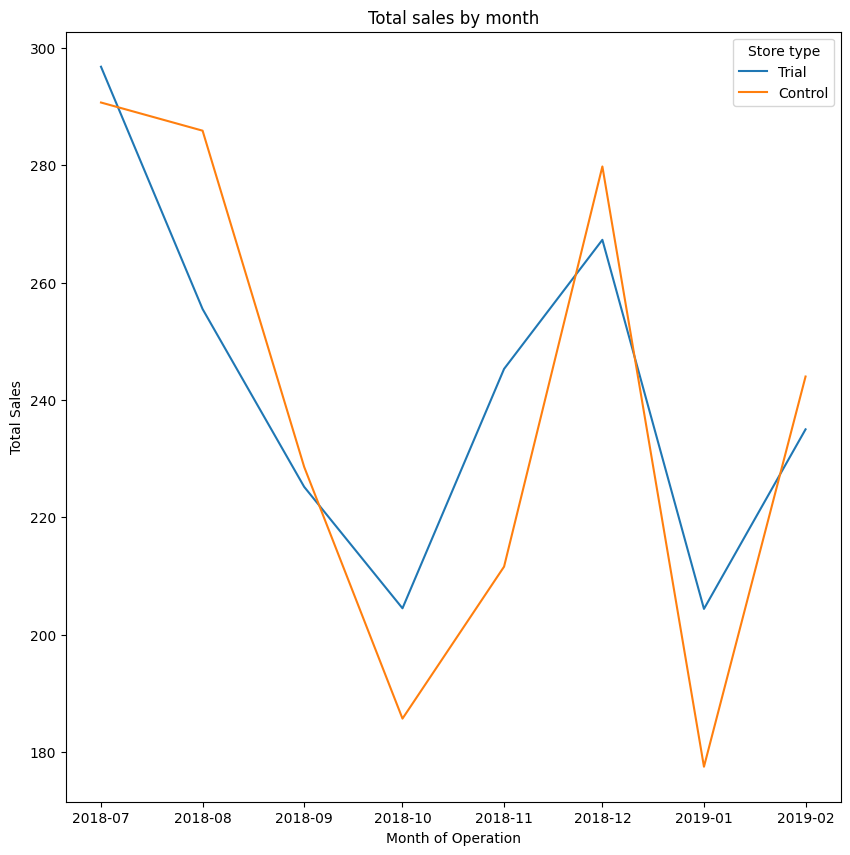

In [23]:
# Plot graph
plt.figure(figsize=(10,10))
sns.lineplot(pastSales, x='TransactionMonth', y='totSales', hue='Store_type')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.title('Total sales by month')
plt.legend(title= 'Store type')

- We will do the same for customers

In [24]:
pastCustomers = measureOverTime[(measureOverTime['STORE_NBR']==77) | (measureOverTime['STORE_NBR']==233)].copy()
pastCustomers['Store_type'] = pastCustomers.apply(
                                                    lambda row: 'Trial' if row['STORE_NBR'] == 77
                                                    else 'Control',
                                                    axis=1
                                                )
pastCustomers['TransactionMonth'] = pd.to_datetime(pastCustomers['MONTH'], format='%Y%m')
pastCustomers = pastCustomers[pastCustomers['MONTH'] < 201903]
pastCustomers.head()

,STORE_NBR,MONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,Store_type,TransactionMonth
880,77,201807,296.8,51,1.078431,1.527273,3.533333,Trial,2018-07-01
881,77,201808,255.5,47,1.021277,1.541667,3.452703,Trial,2018-08-01
882,77,201809,225.2,42,1.047619,1.590909,3.217143,Trial,2018-09-01
883,77,201810,204.5,37,1.027027,1.368421,3.932692,Trial,2018-10-01
884,77,201811,245.3,41,1.073171,1.522727,3.661194,Trial,2018-11-01


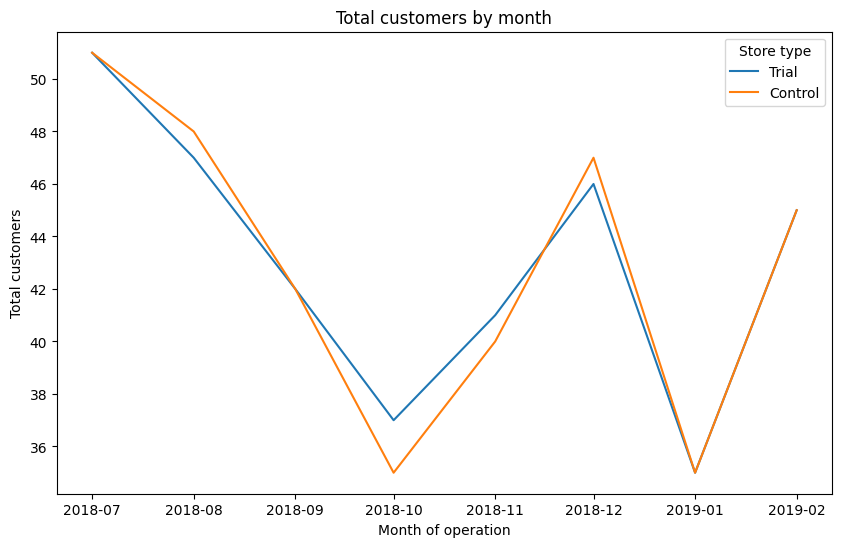

In [25]:
# Plot the data using Matplotlib
plt.figure(figsize=(10, 6))
sns.lineplot(pastCustomers, x='TransactionMonth', y='nCustomers', hue='Store_type')
plt.xlabel('Month of operation')
plt.ylabel('Total customers')
plt.title('Total customers by month')
plt.legend(title='Store type')

Next we will compare the results of the trial period for the trial and control stores

- Scale pre-trial control sales to match pre-trial trial store sales

In [26]:
# Calculate scaling factor
scalingFactor = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == 77) & (preTrialMeasures['MONTH'] < 201902)]['totSales'].sum() / preTrialMeasures[(preTrialMeasures['STORE_NBR'] == 233) & (preTrialMeasures['MONTH'] < 201902)]['totSales'].sum()

# Apply the scaling factor
scaledControlSales = measureOverTime[measureOverTime['STORE_NBR'] == 233].copy()
scaledControlSales['controlSales'] = scaledControlSales['totSales'] * scalingFactor
scaledControlSales = scaledControlSales[['MONTH', 'STORE_NBR', 'controlSales']]
scaledControlSales

,MONTH,STORE_NBR,controlSales
2699,201807,233,297.565550
2700,201808,233,292.652187
2701,201809,233,233.998916
2702,201810,233,190.085733
2703,201811,233,216.597421
2704,201812,233,286.408121
2705,201901,233,181.692071
2706,201902,233,249.762622
2707,201903,233,203.802205
2708,201904,233,162.345704


- Calculate the percentage difference between scaled control sales and trial sales 

In [27]:
percentagediff = pd.merge(scaledControlSales, measureOverTime[measureOverTime['STORE_NBR']==77][['MONTH', 'STORE_NBR', 'totSales']], how='left', on='MONTH')
percentagediff['percentageDiff'] = (percentagediff['totSales'] - percentagediff['controlSales'])/percentagediff['controlSales']
percentagediff

,MONTH,STORE_NBR_x,controlSales,STORE_NBR_y,totSales,percentageDiff
0,201807,233,297.565550,77,296.8,-0.002573
1,201808,233,292.652187,77,255.5,-0.126950
2,201809,233,233.998916,77,225.2,-0.037602
3,201810,233,190.085733,77,204.5,0.075830
4,201811,233,216.597421,77,245.3,0.132516
5,201812,233,286.408121,77,267.3,-0.066716
6,201901,233,181.692071,77,204.4,0.124980
7,201902,233,249.762622,77,235.0,-0.059107
8,201903,233,203.802205,77,278.5,0.366521
9,201904,233,162.345704,77,263.5,0.623080


- Calculate the standard deviation for the percentage difference between sales over the period

In [28]:
stdDev = percentagediff[percentagediff['MONTH'] < 201902]['percentageDiff'].std()
stdDev

0.09958646884078388

- Calculate the t-values of the trial months

In [29]:
percentagediff['tValue'] = (percentagediff[(percentagediff['MONTH'] >= 201902) & (percentagediff['MONTH'] <= 201904)]['percentageDiff'] - percentagediff['percentageDiff'].mean()) / stdDev
trialTable = percentagediff[(percentagediff['MONTH'] >= 201902) & (percentagediff['MONTH'] <= 201904)]
trialTable

,MONTH,STORE_NBR_x,controlSales,STORE_NBR_y,totSales,percentageDiff,tValue
7,201902,233,249.762622,77,235.0,-0.059107,-1.471383
8,201903,233,203.802205,77,278.5,0.366521,2.802568
9,201904,233,162.345704,77,263.5,0.623080,5.378807


- Find the 95th percentile of the t distribution with the appropriate degree of freedom

In [30]:
from scipy.stats import t
# Set degrees of freedom
degreesOfFreedom = 7
# Calculate percentile
p = t.ppf(0.95, df=degreesOfFreedom)
print(f'The 95th percentile of the t-distribution is {p}')

The 95th percentile of the t-distribution is 1.894578605061305


We can observe that the t-values for March and April are much larger the the 95th percentile of the distribution. This means that the increase in sales in the trial store in March and April are significantly greater than that in the control store.

Let's visualize this by plotting the sales and the 95th percentile value of the stores for the trial period.

- Filter data for the 2 stores total sales, and the 95th and 5th percentiles of the control store sales

In [31]:
# Filter the measureOverTime dataframe for only the control and trial stores
pastSales = measureOverTime[(measureOverTime['STORE_NBR']==77) | (measureOverTime['STORE_NBR']==233)].copy()
pastSales['Store_type'] = pastSales.apply(
                                                    lambda row: 'Trial' if row['STORE_NBR'] == 77
                                                    else 'Control',
                                                    axis=1
                                                )
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['MONTH'], format='%Y%m')
pastSales = pastSales[(pastSales['MONTH'] >= 201902) & (pastSales['MONTH'] <= 201904)]
# Create new dataframe with the totSales of control store set to 95th percentile
pastSales_Controls95 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls95['totSales'] = pastSales_Controls95['totSales'] * (1 + stdDev * 2)
pastSales_Controls95['Store_type'] = 'Control 95th % confidence interval'

# Create new dataframe with the totSales of control store set to 5th percentile
pastSales_Controls5 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls5['totSales'] = pastSales_Controls5['totSales'] * (1 - stdDev * 2)
pastSales_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Concat the 3 new dataframes together
trialAssessment = pd.concat([pastSales, pastSales_Controls95, pastSales_Controls5])
trialAssessment

,STORE_NBR,MONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,Store_type,TransactionMonth
887,77,201902,235.000000,45,1.000000,1.644444,3.175676,Trial,2019-02-01
888,77,201903,278.500000,50,1.100000,1.490909,3.396341,Trial,2019-03-01
889,77,201904,263.500000,47,1.021277,1.625000,3.378205,Trial,2019-04-01
2706,233,201902,244.000000,45,1.044444,1.489362,3.485714,Control,2019-02-01
2707,233,201903,199.100000,40,1.025000,1.439024,3.374576,Control,2019-03-01
2708,233,201904,158.600000,30,1.100000,1.393939,3.447826,Control,2019-04-01
2706,233,201902,292.598197,45,1.044444,1.489362,3.485714,Control 95th % confidence interval,2019-02-01
2707,233,201903,238.755332,40,1.025000,1.439024,3.374576,Control 95th % confidence interval,2019-03-01
2708,233,201904,190.188828,30,1.100000,1.393939,3.447826,Control 95th % confidence interval,2019-04-01
2706,233,201902,195.401803,45,1.044444,1.489362,3.485714,Control 5th % confidence interval,2019-02-01


<Axes: xlabel='TransactionMonth', ylabel='totSales'>

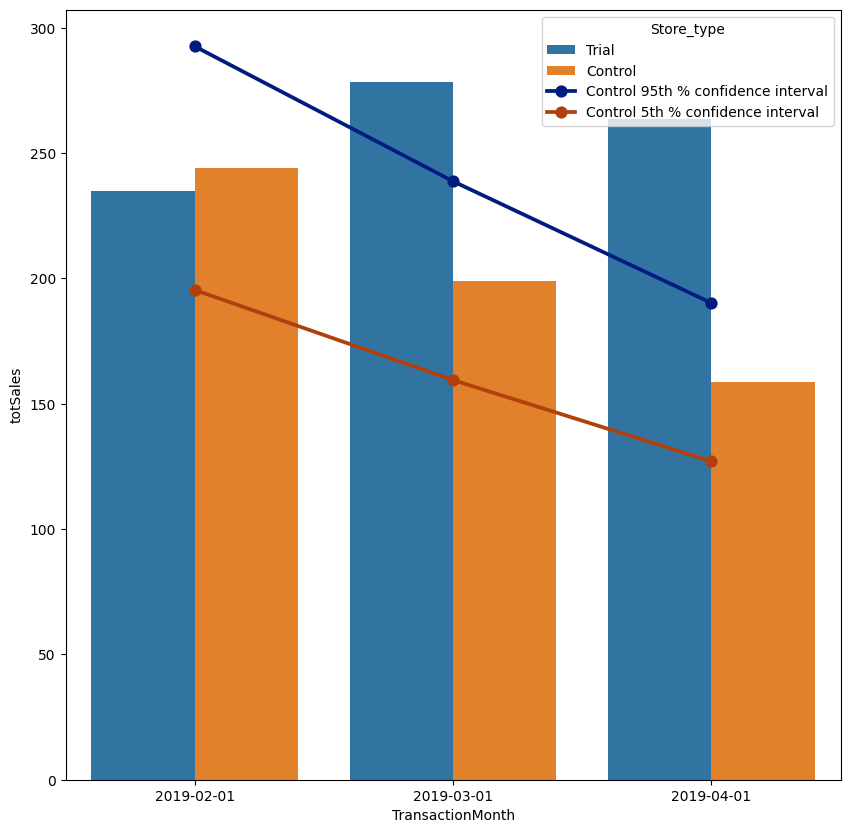

In [32]:
bar = trialAssessment[(trialAssessment['Store_type'] == 'Control') | (trialAssessment['Store_type'] == 'Trial')]
line = trialAssessment[~((trialAssessment['Store_type'] == 'Control') | (trialAssessment['Store_type'] == 'Trial'))]

fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(data=bar, x='TransactionMonth', y='totSales', hue='Store_type', ax=ax)
sns.pointplot(data=line, x='TransactionMonth', y='totSales', hue='Store_type', ax=ax, palette='dark')

Let us now look at this assessment for the number of customers as well. We will be repeating the process from above and only displaying the outputs relevant to our analysis

In [33]:
# Calculate scaling factor
scalingFactor = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == 77) & (preTrialMeasures['MONTH'] < 201902)]['nCustomers'].sum() / preTrialMeasures[(preTrialMeasures['STORE_NBR'] == 233) & (preTrialMeasures['MONTH'] < 201902)]['nCustomers'].sum()

# Apply the scaling factor
scaledControlCustomers = measureOverTime[measureOverTime['STORE_NBR'] == 233].copy()
scaledControlCustomers['controlCustomers'] = scaledControlCustomers['nCustomers'] * scalingFactor
scaledControlCustomers = scaledControlCustomers[['MONTH', 'STORE_NBR', 'controlCustomers']]

# Calculate the percentage difference between the trial and scaled control values
percentagediff = pd.merge(scaledControlCustomers, measureOverTime[measureOverTime['STORE_NBR']==77][['MONTH', 'STORE_NBR', 'nCustomers']], how='left', on='MONTH')
percentagediff['percentageDiff'] = (percentagediff['nCustomers'] - percentagediff['controlCustomers'])/percentagediff['controlCustomers']

# Calculate the standard deviation
stdDev = percentagediff[percentagediff['MONTH'] < 201902]['percentageDiff'].std()

- Calculate the t-values of the customer amounts

In [34]:
percentagediff['tValue'] = (percentagediff[(percentagediff['MONTH'] >= 201902) & (percentagediff['MONTH'] <= 201904)]['percentageDiff'] - percentagediff['percentageDiff'].mean()) / stdDev
trialTable = percentagediff[(percentagediff['MONTH'] >= 201902) & (percentagediff['MONTH'] <= 201904)]
trialTable

,MONTH,STORE_NBR_x,controlCustomers,STORE_NBR_y,nCustomers,percentageDiff,tValue
7,201902,233,45.151007,77,45,-0.003344,-2.486836
8,201903,233,40.134228,77,50,0.245819,6.593494
9,201904,233,30.100671,77,47,0.561427,18.095245


- Find the 95th percentile of the t distribution with the appropriate degree of freedom

In [35]:
from scipy.stats import t
# Set degrees of freedom
degreesOfFreedom = 7
# Calculate percentile
p = t.ppf(0.95, df=degreesOfFreedom)
print(f'The 95th percentile of the t-distribution is {p}')

The 95th percentile of the t-distribution is 1.894578605061305


In [36]:
# Filter the measureOverTime dataframe for only the control and trial stores
pastCustomers = measureOverTime[(measureOverTime['STORE_NBR']==77) | (measureOverTime['STORE_NBR']==233)].copy()
pastCustomers['Store_type'] = pastCustomers.apply(
                                                    lambda row: 'Trial' if row['STORE_NBR'] == 77
                                                    else 'Control',
                                                    axis=1
                                                )
pastCustomers['TransactionMonth'] = pd.to_datetime(pastCustomers['MONTH'], format='%Y%m')
pastCustomers = pastCustomers[(pastCustomers['MONTH'] >= 201902) & (pastCustomers['MONTH'] <= 201904)]

# Create new dataframe with the nCustomers of control store set to 95th percentile
pastCustomers_Controls95 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls95['nCustomers'] = pastCustomers_Controls95['nCustomers'] * (1 + stdDev * 2)
pastCustomers_Controls95['Store_type'] = 'Control 95th % confidence interval'

# Create new dataframe with the nCustomers of control store set to 5th percentile
pastCustomers_Controls5 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls5['nCustomers'] = pastCustomers_Controls5['nCustomers'] * (1 - stdDev * 2)
pastCustomers_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Concat the 3 new dataframes together
trialAssessment = pd.concat([pastCustomers, pastCustomers_Controls95, pastCustomers_Controls5])
trialAssessment

,STORE_NBR,MONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,Store_type,TransactionMonth
887,77,201902,235.0,45.000000,1.000000,1.644444,3.175676,Trial,2019-02-01
888,77,201903,278.5,50.000000,1.100000,1.490909,3.396341,Trial,2019-03-01
889,77,201904,263.5,47.000000,1.021277,1.625000,3.378205,Trial,2019-04-01
2706,233,201902,244.0,45.000000,1.044444,1.489362,3.485714,Control,2019-02-01
2707,233,201903,199.1,40.000000,1.025000,1.439024,3.374576,Control,2019-03-01
2708,233,201904,158.6,30.000000,1.100000,1.393939,3.447826,Control,2019-04-01
2706,233,201902,244.0,47.469596,1.044444,1.489362,3.485714,Control 95th % confidence interval,2019-02-01
2707,233,201903,199.1,42.195197,1.025000,1.439024,3.374576,Control 95th % confidence interval,2019-03-01
2708,233,201904,158.6,31.646398,1.100000,1.393939,3.447826,Control 95th % confidence interval,2019-04-01
2706,233,201902,244.0,42.530404,1.044444,1.489362,3.485714,Control 5th % confidence interval,2019-02-01


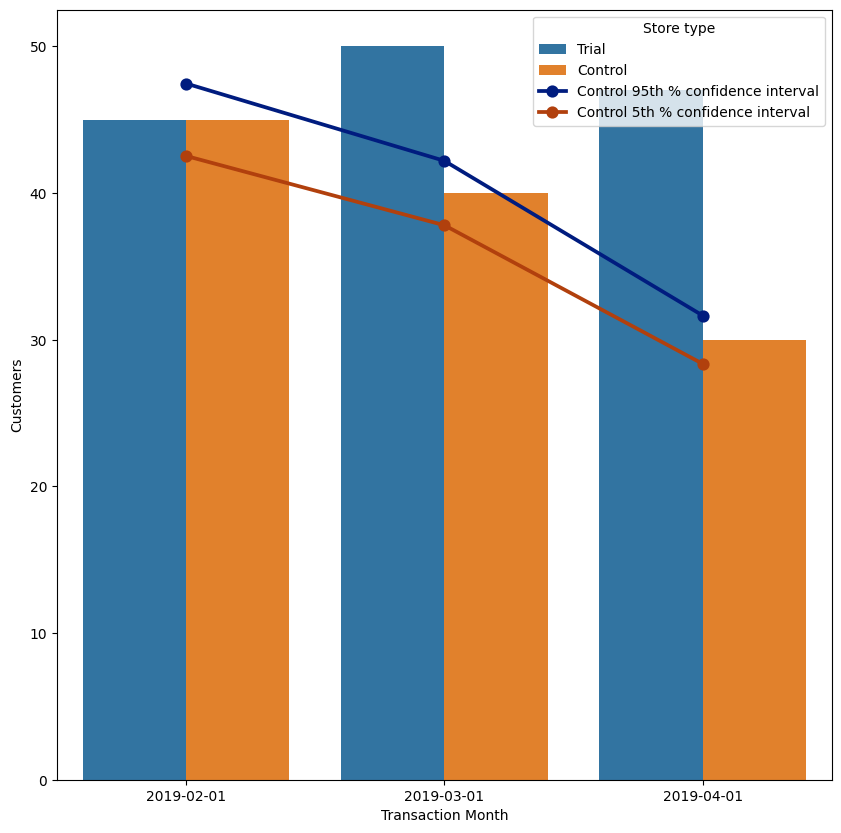

In [37]:
bar = trialAssessment[(trialAssessment['Store_type'] == 'Control') | (trialAssessment['Store_type'] == 'Trial')]
line = trialAssessment[~((trialAssessment['Store_type'] == 'Control') | (trialAssessment['Store_type'] == 'Trial'))]

fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(data=bar, x='TransactionMonth', y='nCustomers', hue='Store_type')
sns.pointplot(data=line, x='TransactionMonth', y='nCustomers', hue='Store_type', palette='dark')
plt.xlabel('Transaction Month')
plt.ylabel('Customers')
plt.legend(title='Store type')

 #! ADD INSIGHT

We can now use the same method as before to identify the most suitable control store and assess the impact of the trial on the trial stores. The next trial store to examine will be store 86

- Calculate the correlation scores for each store with trial store 86 for drivers total sales and customers.

In [38]:
# Sales correlation
corr_nSales = calculateCorrelation('totSales', 86)
corr_nSales

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE
0,1,86,-1.0
1,2,86,-1.0
2,3,86,-1.0
3,4,86,-1.0
4,5,86,-1.0
...,...,...,...
252,268,86,1.0
253,269,86,1.0
254,270,86,1.0
255,271,86,1.0


In [39]:
# Customers correlation
corr_nCustomers = calculateCorrelation('nCustomers', 86)
corr_nCustomers

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE
0,1,86,-1.0
1,2,86,-1.0
2,3,86,-1.0
3,4,86,-1.0
4,5,86,-1.0
...,...,...,...
252,268,86,1.0
253,269,86,1.0
254,270,86,1.0
255,271,86,1.0


- Next calculate and create tables for the magnitude distance for the drivers between store 86 and the other stores

In [40]:
magnitude_nSales = minMaxDist(calculateMagnitudeDistance('totSales', 86))
magnitude_nSales

,CONTROL_STORE,TRIAL_STORE,mag_measure
0,1,86,0.220565
1,2,86,0.179640
2,3,86,0.762894
3,4,86,0.498526
4,5,86,0.929321
...,...,...,...
252,268,86,0.250819
253,269,86,0.902040
254,270,86,0.834520
255,271,86,0.922919


In [41]:
magnitude_nCustomers = minMaxDist(calculateMagnitudeDistance('nCustomers', 86))
magnitude_nCustomers

,CONTROL_STORE,TRIAL_STORE,mag_measure
0,1,86,0.444597
1,2,86,0.380620
2,3,86,0.911850
3,4,86,0.773922
4,5,86,0.926509
...,...,...,...
252,268,86,0.427390
253,269,86,0.917082
254,270,86,0.890489
255,271,86,0.935896


- The seperate tables for correlation and magnitude distance can now be merged to calculate a final score for each store

In [42]:
scoreNSales = merge_calcs(['totSales'], 86)

In [43]:
scoreNCustomers = merge_calcs('nCustomers', 86)
scoreNCustomers

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE,mag_measure,Merged_Score
0,1,86,-1.0,0.444597,-0.277702
1,2,86,-1.0,0.380620,-0.309690
2,3,86,-1.0,0.911850,-0.044075
3,4,86,-1.0,0.773922,-0.113039
4,5,86,-1.0,0.926509,-0.036746
...,...,...,...,...,...
252,268,86,1.0,0.427390,0.713695
253,269,86,1.0,0.917082,0.958541
254,270,86,1.0,0.890489,0.945244
255,271,86,1.0,0.935896,0.967948


In [44]:
# Merge score tables to calculate final score 
scoreControl = scoreNSales.merge(scoreNCustomers, on= ['TRIAL_STORE', 'CONTROL_STORE'])
scoreControl['Final_Score'] = 0.5 * scoreControl['Merged_Score_x'] + 0.5 * scoreControl['Merged_Score_y']
scoreControl

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE_x,mag_measure_x,Merged_Score_x,CORRELATION_SCORE_y,mag_measure_y,Merged_Score_y,Final_Score
0,1,86,-1.0,0.220565,-0.389717,-1.0,0.444597,-0.277702,-0.333709
1,2,86,-1.0,0.179640,-0.410180,-1.0,0.380620,-0.309690,-0.359935
2,3,86,-1.0,0.762894,-0.118553,-1.0,0.911850,-0.044075,-0.081314
3,4,86,-1.0,0.498526,-0.250737,-1.0,0.773922,-0.113039,-0.181888
4,5,86,-1.0,0.929321,-0.035340,-1.0,0.926509,-0.036746,-0.036043
...,...,...,...,...,...,...,...,...,...
252,268,86,1.0,0.250819,0.625410,1.0,0.427390,0.713695,0.669552
253,269,86,1.0,0.902040,0.951020,1.0,0.917082,0.958541,0.954781
254,270,86,1.0,0.834520,0.917260,1.0,0.890489,0.945244,0.931252
255,271,86,1.0,0.922919,0.961459,1.0,0.935896,0.967948,0.964704


In [45]:
# Sort score table to find the closest matching store
scoreControl.sort_values('Final_Score', ascending=False).head()

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE_x,mag_measure_x,Merged_Score_x,CORRELATION_SCORE_y,mag_measure_y,Merged_Score_y,Final_Score
144,155,86,1.0,0.964782,0.982391,1.0,0.985037,0.992519,0.987455
99,109,86,1.0,0.963810,0.981905,1.0,0.965940,0.982970,0.982437
210,225,86,1.0,0.958060,0.979030,1.0,0.967367,0.983683,0.981357
214,229,86,1.0,0.950408,0.975204,1.0,0.962017,0.981009,0.978106
232,247,86,1.0,0.934851,0.967426,1.0,0.946897,0.973449,0.970437


The store with the highest final score, and therefore the closest to the selected trial store, is Store 233. Now that we have found a control store, let's visually check if the drivers are indeed similar in the period before the trial.

- We will first filter the driver data for the stores

In [ ]:
# Filter the measureOverTime dataframe for only the control and trial stores
pastSales = measureOverTime[(measureOverTime['STORE_NBR']==86) | (measureOverTime['STORE_NBR']==233)].copy()
pastSales['Store_type'] = pastSales.apply(
                                                    lambda row: 'Trial' if row['STORE_NBR'] == 86
                                                    else 'Control',
                                                    axis=1
                                                )
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['MONTH'], format='%Y%m')
pastSales = pastSales[pastSales['MONTH'] < 201903]
pastSales.head()

- Next we will plot the total sales for both stores to visually compare them

In [ ]:
# Plot graph
plt.figure(figsize=(10,10))
sns.lineplot(pastSales, x='TransactionMonth', y='totSales', hue='Store_type')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.title('Total sales by month')
plt.legend(title= 'Store type')

- We will do the same for customers

In [ ]:
pastCustomers = measureOverTime[(measureOverTime['STORE_NBR']==86) | (measureOverTime['STORE_NBR']==233)].copy()
pastCustomers['Store_type'] = pastCustomers.apply(
                                                    lambda row: 'Trial' if row['STORE_NBR'] == 86
                                                    else 'Control',
                                                    axis=1
                                                )
pastCustomers['TransactionMonth'] = pd.to_datetime(pastCustomers['MONTH'], format='%Y%m')
pastCustomers = pastCustomers[pastCustomers['MONTH'] < 201903]
pastCustomers.head()

In [ ]:
# Plot the data using Matplotlib
plt.figure(figsize=(10, 6))
sns.lineplot(pastCustomers, x='TransactionMonth', y='nCustomers', hue='Store_type')
plt.xlabel('Month of operation')
plt.ylabel('Total customers')
plt.title('Total customers by month')
plt.legend(title='Store type')

Next we will compare the results of the trial period for the trial and control stores

- Scale pre-trial control sales to match pre-trial trial store sales

In [ ]:
# Calculate scaling factor
scalingFactor = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == 86) & (preTrialMeasures['MONTH'] < 201902)]['totSales'].sum() / preTrialMeasures[(preTrialMeasures['STORE_NBR'] == 233) & (preTrialMeasures['MONTH'] < 201902)]['totSales'].sum()

# Apply the scaling factor
scaledControlSales = measureOverTime[measureOverTime['STORE_NBR'] == 233].copy()
scaledControlSales['controlSales'] = scaledControlSales['totSales'] * scalingFactor
scaledControlSales = scaledControlSales[['MONTH', 'STORE_NBR', 'controlSales']]
scaledControlSales

- Calculate the percentage difference between scaled control sales and trial sales 

In [ ]:
percentagediff = pd.merge(scaledControlSales, measureOverTime[measureOverTime['STORE_NBR']==86][['MONTH', 'STORE_NBR', 'totSales']], how='left', on='MONTH')
percentagediff['percentageDiff'] = (percentagediff['totSales'] - percentagediff['controlSales'])/percentagediff['controlSales']
percentagediff

- Calculate the standard deviation for the percentage difference between sales over the period

In [ ]:
stdDev = percentagediff[percentagediff['MONTH'] < 201902]['percentageDiff'].std()
stdDev

- Calculate the t-values of the trial months

In [ ]:
percentagediff['tValue'] = (percentagediff[(percentagediff['MONTH'] >= 201902) & (percentagediff['MONTH'] <= 201904)]['percentageDiff'] - percentagediff['percentageDiff'].mean()) / stdDev
trialTable = percentagediff[(percentagediff['MONTH'] >= 201902) & (percentagediff['MONTH'] <= 201904)]
trialTable

- Find the 95th percentile of the t distribution with the appropriate degree of freedom

In [ ]:
from scipy.stats import t
# Set degrees of freedom
degreesOfFreedom = 7
# Calculate percentile
p = t.ppf(0.95, df=degreesOfFreedom)
print(f'The 95th percentile of the t-distribution is {p}')